In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats 
warnings.filterwarnings('ignore')

In [59]:
conn = sqlite3.connect(r"C:\Users\lenovo\OneDrive\Desktop\vendor\inventory.db")

df=pd.read_sql_query("select * from vendor_sales_summary_clean",conn) 
df.head

<bound method NDFrame.head of        VendorNumber                   VendorName  Brand  \
0              1128  BROWN-FORMAN CORP             1233   
1              4425        MARTIGNETTI COMPANIES   3405   
2             17035  PERNOD RICARD USA             8068   
3              3960  DIAGEO NORTH AMERICA INC      4261   
4              3960  DIAGEO NORTH AMERICA INC      3545   
...             ...                          ...    ...   
10687          9815  WINE GROUP INC                8527   
10688          8004  SAZERAC CO INC                5683   
10689          3924  HEAVEN HILL DISTILLERIES      9123   
10690          3960  DIAGEO NORTH AMERICA INC      6127   
10691          7245  PROXIMO SPIRITS INC.          3065   

                       Description  AvgPurchasePrice  TotalPurchaseQuantity  \
0          Jack Daniels No 7 Black             26.27                 145080   
1            Tito's Handmade Vodka             23.19                 164038   
2                 Absolu

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,1.875352e+04,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,1.266219e+04,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
AvgPurchasePrice,10692.0,24.385303,1.092694e+02,0.360000,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseQuantity,10692.0,3140.886831,1.109509e+04,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,1.230678e+05,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
AvgActualPrice,10692.0,35.643671,1.482460e+02,0.490000,10.990000,15.990000,28.990000,7.499990e+03
TotalVolume,10692.0,265550.515853,1.069263e+06,50.000000,2250.000000,13500.000000,114750.000000,2.484000e+07
TotalSalesDollars,10692.0,42239.074419,1.676553e+05,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,18793.783627,4.495277e+04,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3077.482136,1.095285e+04,0.000000,33.000000,261.000000,1929.250000,3.349390e+05


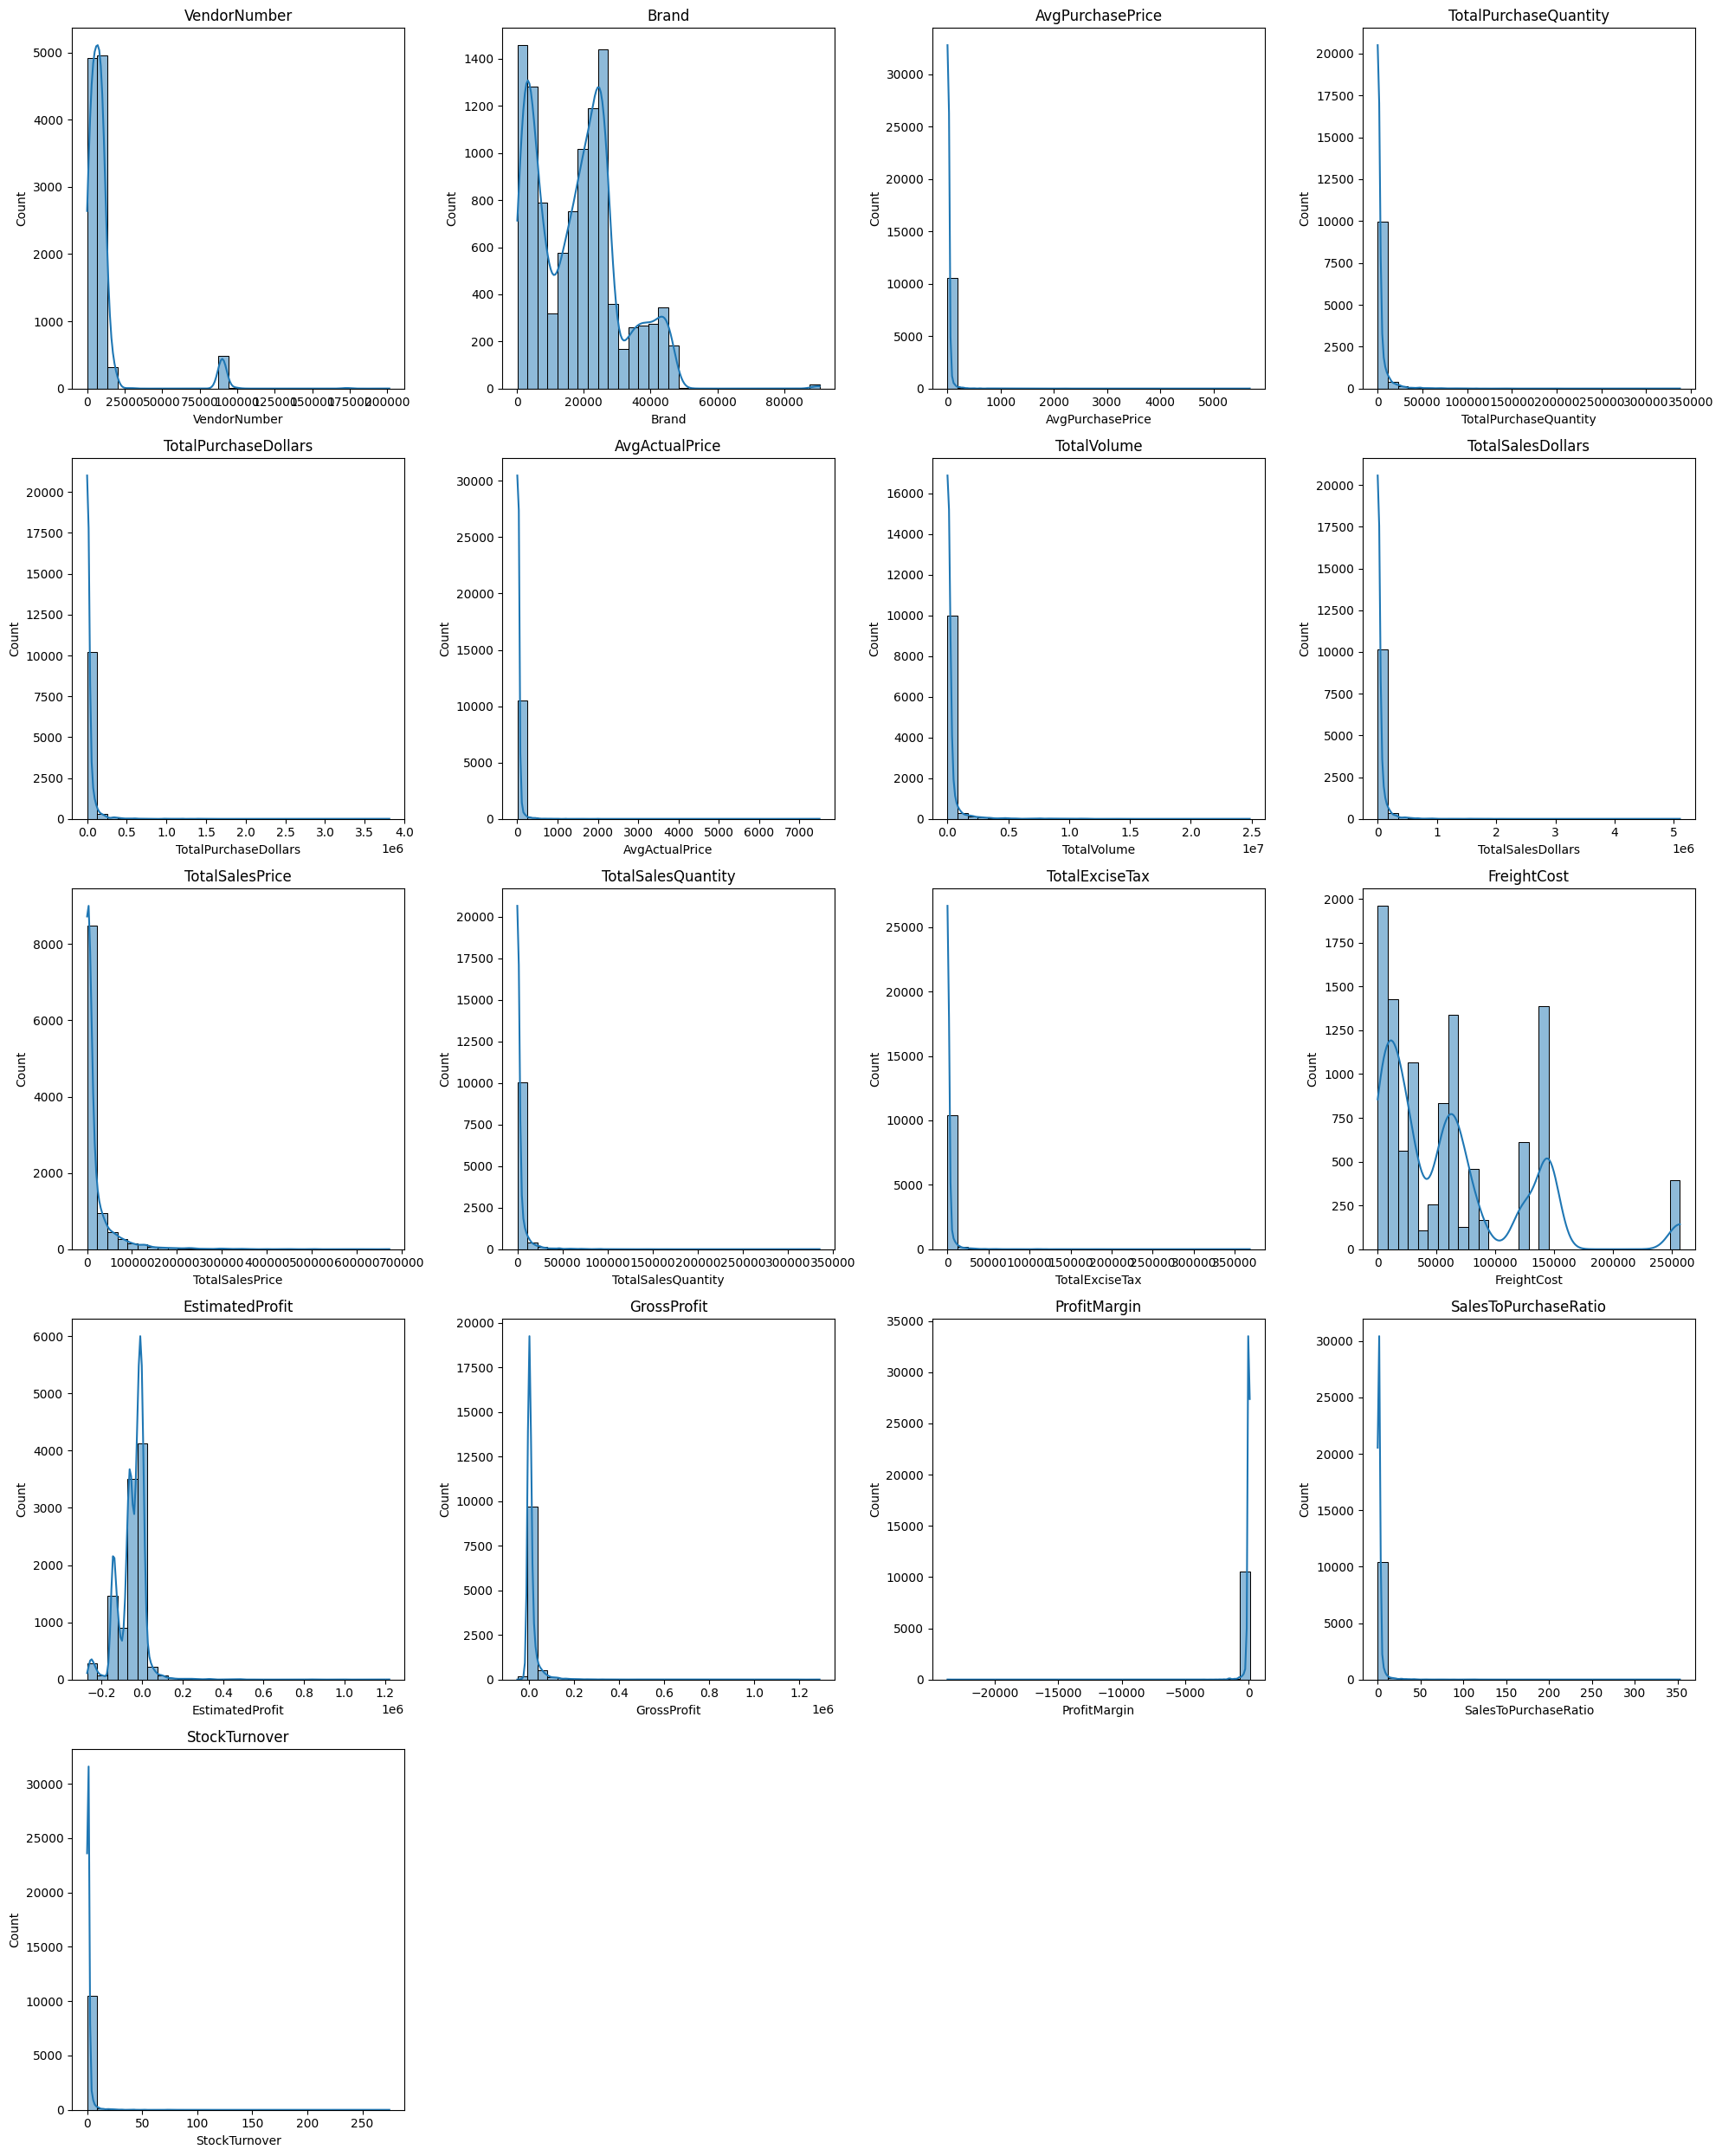

In [61]:
import math

# Select numeric columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate grid size automatically
num_cols = len(numerical_cols)
cols = 4   # number of plots per row
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(20, 5*rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


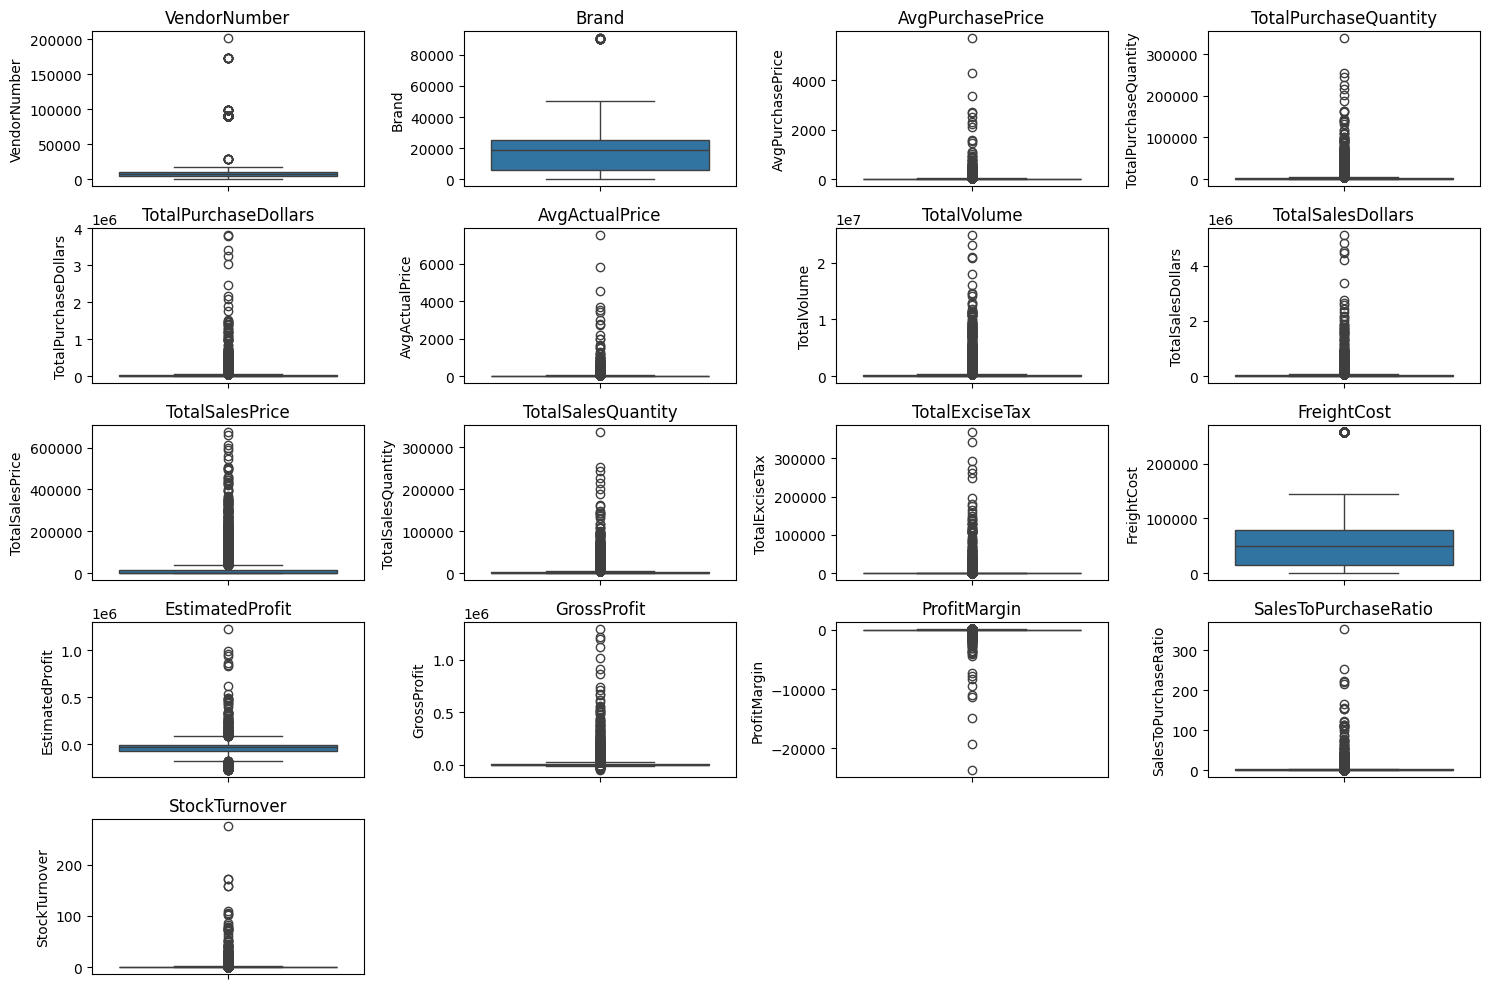

In [62]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)#adjust grid as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [63]:
df = pd.read_sql_query("""
SELECT *
FROM vendor_sales_summary_clean
WHERE GrossProfit > 0
  AND ProfitMargin > 0
  AND TotalPurchaseQuantity	 > 0
""", conn)

print("✅ Filtered rows:", len(df))
display(df.head())


✅ Filtered rows: 8564


,VendorNumber,VendorName,Brand,Description,AvgPurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,AvgActualPrice,TotalVolume,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,EstimatedProfit,GrossProfit,ProfitMargin,SalesToPurchaseRatio,StockTurnover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,145080,3811251.60,36.99,11522000.0,5101919.51,672819.31,142049.0,260999.20,68601.68,1222066.23,1290667.91,25.297693,1.338647,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,164038,3804041.22,28.99,11385500.0,4819073.49,561512.37,160247.0,294438.66,144929.24,870103.03,1015032.27,21.062810,1.266830,0.976890
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,187407,3418303.68,24.99,12878250.0,4538120.60,461140.15,187140.0,343854.07,123780.22,996036.70,1119816.92,24.675786,1.327594,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,201682,3261197.94,22.99,11854500.0,4475972.88,420050.01,200412.0,368242.80,257032.07,957742.87,1214774.94,27.139908,1.372493,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,138109,3023206.01,29.99,11070500.0,4223107.62,545778.28,135838.0,249587.83,257032.07,942869.54,1199901.61,28.412764,1.396897,0.983556


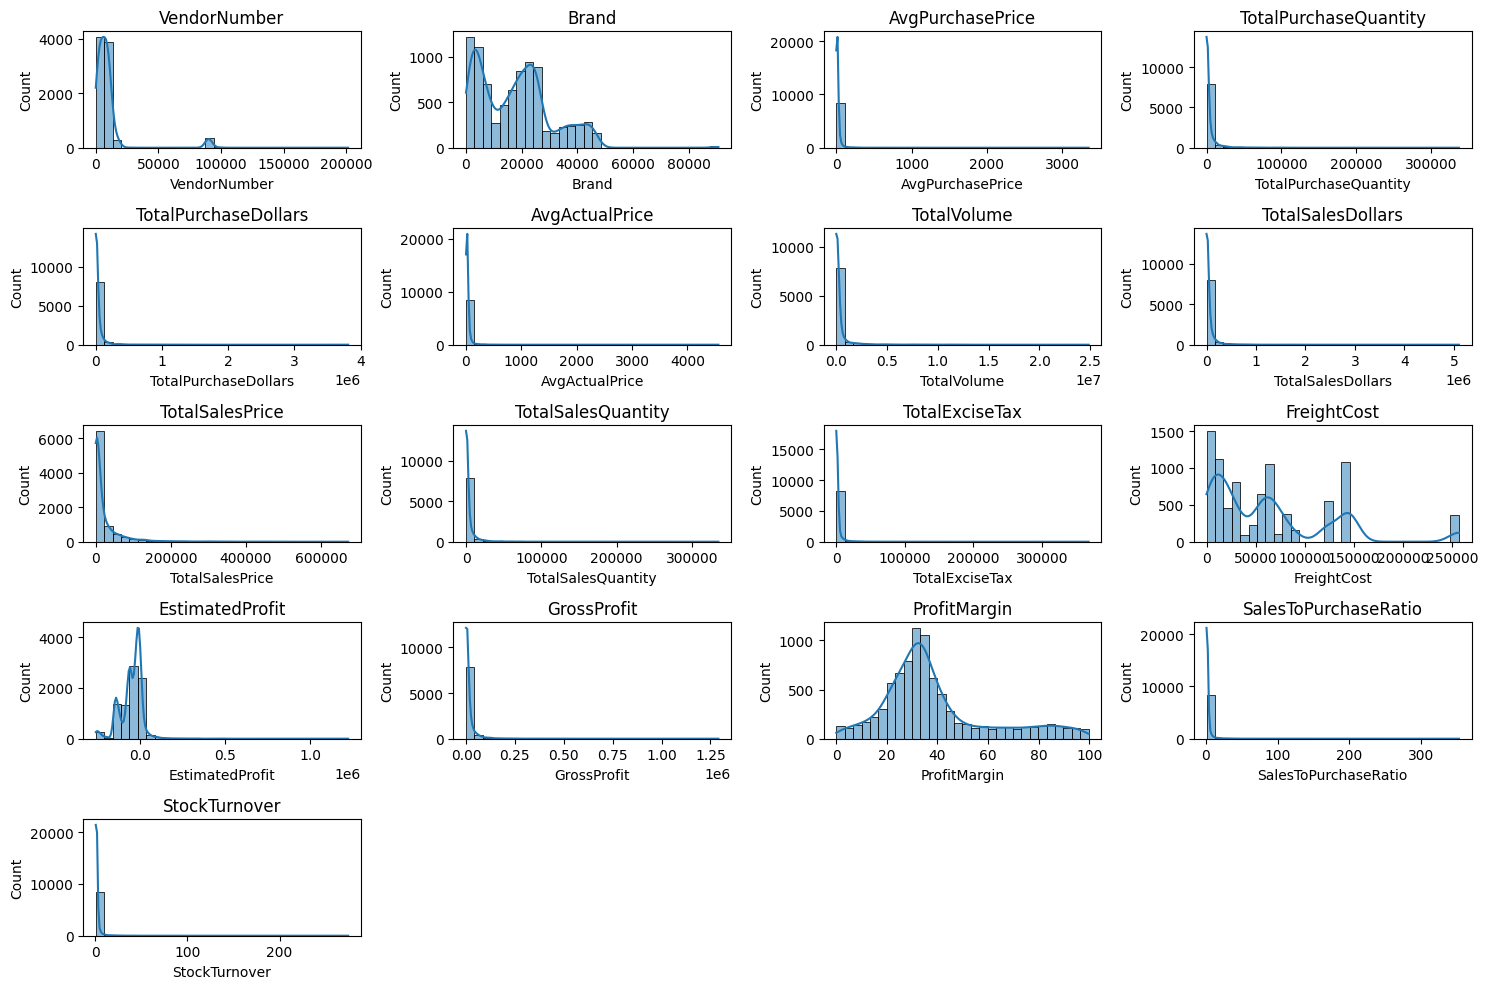

In [64]:
#distribution plot on numerical colomns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)#adjust grid as needed
    sns.histplot(df[col],kde=True ,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

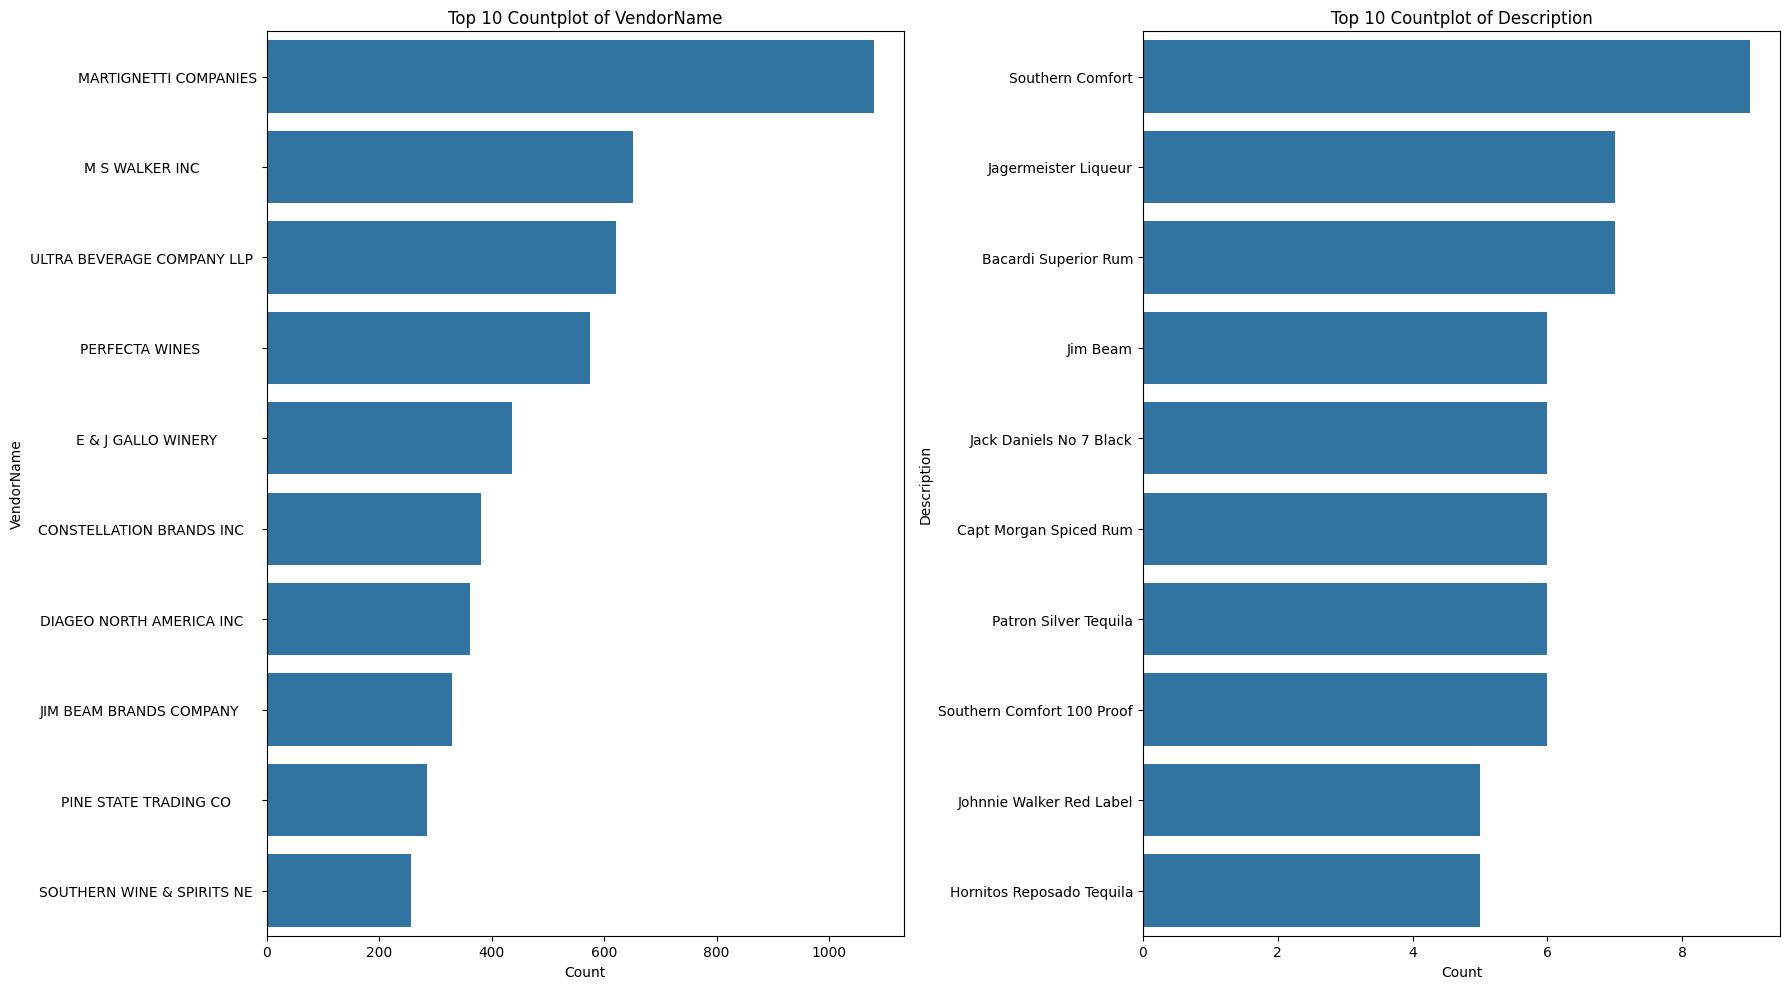

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)

    top_10 = df[col].value_counts().index[:10]

    sns.countplot(
        y=df[col],
        order=top_10
    )

    plt.title(f"Top 10 Countplot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


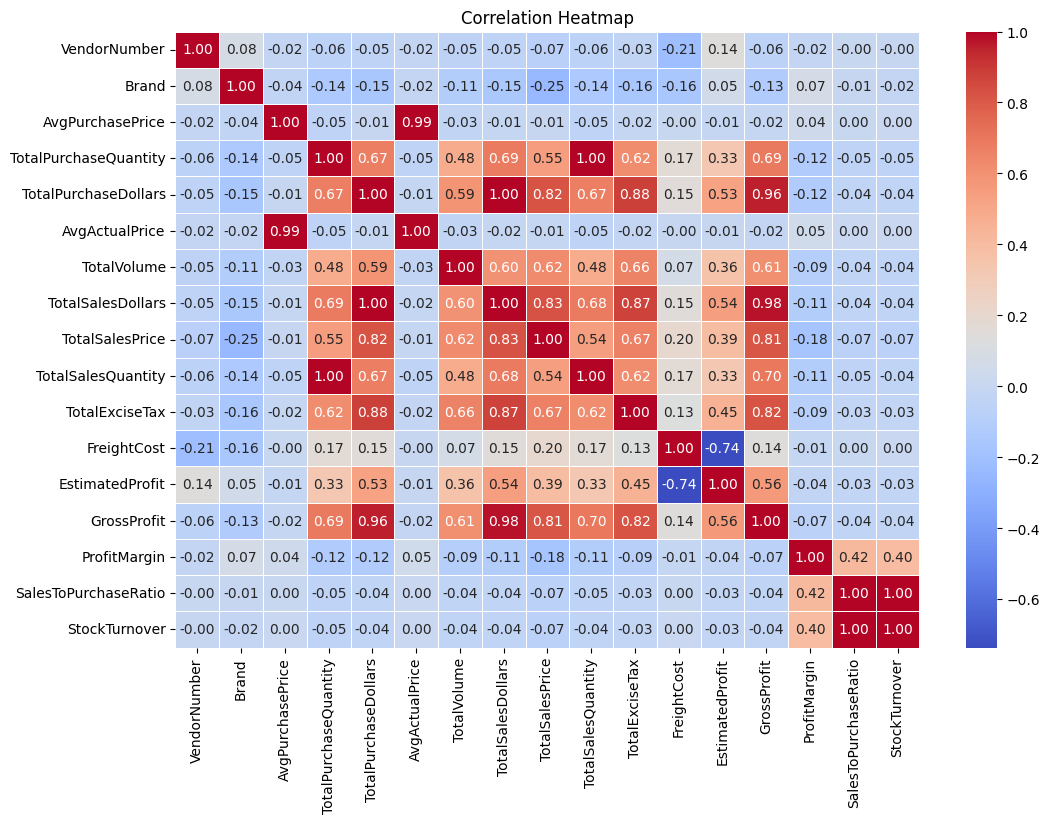

In [66]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5
            )
plt.title("Correlation Heatmap")
plt.show()

In [67]:
'Description' in df.columns


True

In [68]:
print(df.columns)


Index(['VendorNumber', 'VendorName', 'Brand', 'Description',
       'AvgPurchasePrice', 'TotalPurchaseQuantity', 'TotalPurchaseDollars',
       'AvgActualPrice', 'TotalVolume', 'TotalSalesDollars', 'TotalSalesPrice',
       'TotalSalesQuantity', 'TotalExciseTax', 'FreightCost',
       'EstimatedProfit', 'GrossProfit', 'ProfitMargin',
       'SalesToPurchaseRatio', 'StockTurnover'],
      dtype='object')


In [69]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [70]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [71]:
low_sales_threshold

np.float64(560.299)

In [72]:
high_margin_threshold

np.float64(64.97017552750113)

In [73]:
# filter brands with low sales but high profit margins
target_brand = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("✅ Target Brands Found:", len(target_brand))
display(target_brand.sort_values('TotalSalesDollars'))

✅ Target Brands Found: 198


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [74]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<1000]

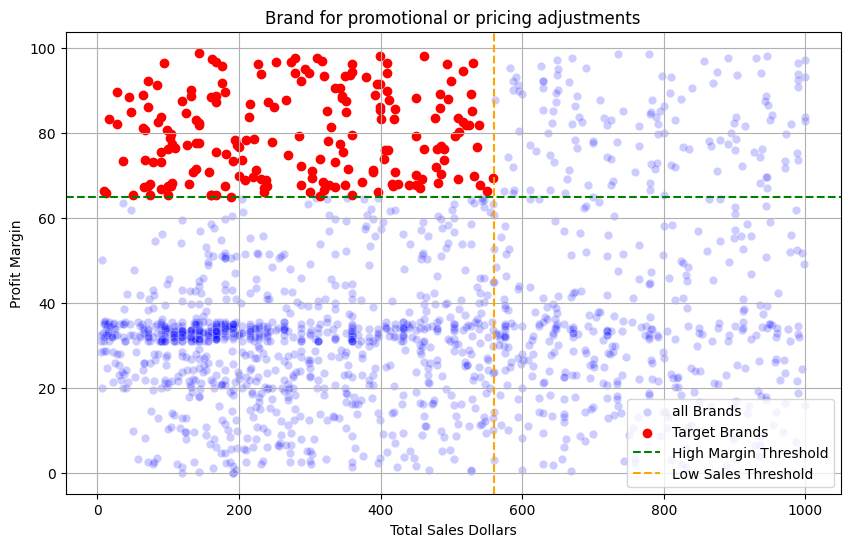

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(brand_performance, x='TotalSalesDollars', y='ProfitMargin',color='blue',label='all Brands',alpha=0.2)
plt.scatter(target_brand['TotalSalesDollars'], target_brand['ProfitMargin'], color='red', label='Target Brands')

plt.axhline(y=high_margin_threshold, color='green', linestyle='--', label='High Margin Threshold')
plt.axvline(x=low_sales_threshold, color='orange', linestyle='--', label='Low Sales Threshold')

plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin')
plt.title('Brand for promotional or pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
# which vendors or brands perform the highest sales performance


In [77]:
#top vendor or brands by sales performance
top_vendors =df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands =df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC       67990099.42
MARTIGNETTI COMPANIES          39276398.80
PERNOD RICARD USA              32063196.19
JIM BEAM BRANDS COMPANY        31423020.46
BACARDI USA INC                24854817.14
CONSTELLATION BRANDS INC       24218745.65
E & J GALLO WINERY             18399899.46
BROWN-FORMAN CORP              18247230.65
ULTRA BEVERAGE COMPANY LLP     16502544.31
M S WALKER INC                 14706458.51
Name: TotalSalesDollars, dtype: float64

In [78]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [79]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"${value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"${value / 1_000:.2f}K" 
    else:
        return str(value)

In [80]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

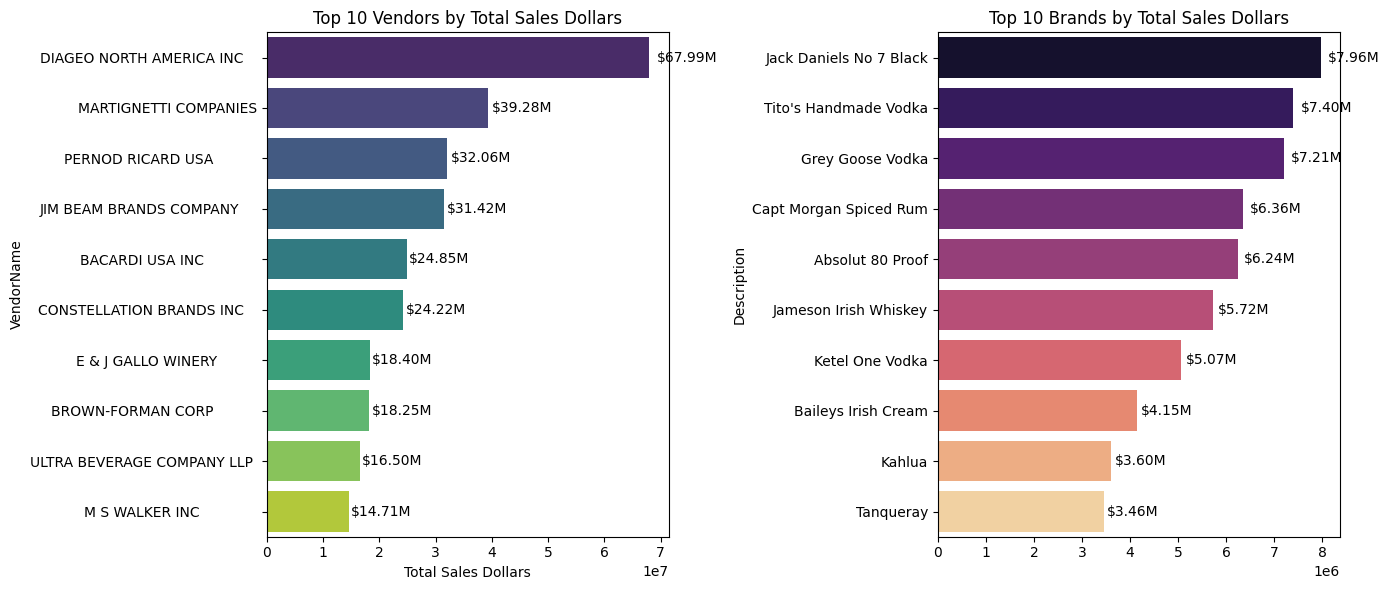

In [81]:
plt.figure(figsize=(14,6))

#plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='viridis')
plt.title('Top 10 Vendors by Total Sales Dollars')
plt.xlabel('Total Sales Dollars')

for bar in ax1.patches:
    ax1.text(bar.get_width()+  (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10,color='black')
    
    #plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(x=top_brands.values, y=top_brands.index.astype(str), palette='magma')
plt.title('Top 10 Brands by Total Sales Dollars')

for bar in ax2.patches:
    ax2.text(bar.get_width()+  (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10,color='black')
    
    plt.tight_layout()
plt.show()
    

In [82]:


#which vendor contribute most to purchase dollars

In [83]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [84]:
vendor_performance['purchase_contributiion%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()) * 100

In [85]:
vendor_performance = round(vendor_performance.sort_values('purchase_contributiion%', ascending=False),2)

In [86]:
#display top 10 vendors by purchase contribution
top_vendor= vendor_performance.head(10)
top_vendor['TotalPurchaseDollars'] = top_vendor['TotalPurchaseDollars'].apply(format_dollars)
top_vendor['GrossProfit'] = top_vendor['GrossProfit'].apply(format_dollars)
top_vendor['TotalSalesDollars'] = top_vendor['TotalSalesDollars'].apply(format_dollars)
top_vendor['cummulative_contribution%'] = top_vendor['purchase_contributiion%'].cumsum()
top_vendor

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,purchase_contributiion%,cummulative_contribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,$25.46M,$13.81M,$39.28M,8.29,24.59
69,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64,39.99
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97,50.63
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31,54.94
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63,62.50
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18,65.68


In [87]:
top_vendor['purchase_contributiion%'].sum()

np.float64(65.68)

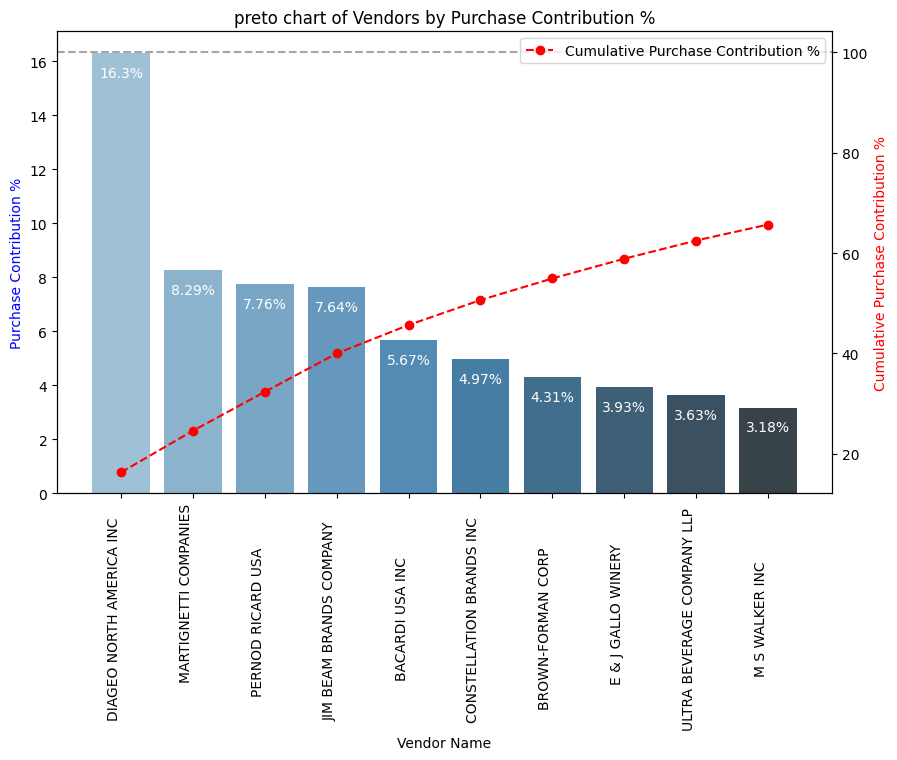

In [88]:
fig,ax1 = plt.subplots(figsize=(10,6))

#bar plot for purchase contribution
sns.barplot(x=top_vendor['VendorName'], y=top_vendor['purchase_contributiion%'], palette='Blues_d', ax=ax1)
plt.title('preto chart of Vendors by Purchase Contribution %')
plt.xlabel('Vendor Name')
plt.ylabel('Purchase Contribution %')
for i,value in enumerate(top_vendor['purchase_contributiion%']):
    ax1.text(i, value - 1 , str(value) + '%', ha='center', va='bottom', fontsize=10, color='white')

#;ine plot for cummulative purchase contribution

ax2 = ax1.twinx()
ax2.plot(top_vendor['VendorName'], top_vendor['cummulative_contribution%'], color='red', marker='o', label='Cumulative Purchase Contribution %',linestyle='--'   )


ax1.set_xticklabels(top_vendor['VendorName'], rotation=90, ha='right')
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Purchase Contribution %',color='red')
ax1.set_xlabel('Vendor Name')

ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


In [89]:
#how much of total procurement is depended on top vendors

In [90]:
print(f"Totl purchase contribution by top 10 vendors is {round(top_vendor['purchase_contributiion%'].sum(),2)}%")

Totl purchase contribution by top 10 vendors is 65.68%


Text(0.5, 1.0, 'Purchase Contribution Distribution: Top 10 Vendors vs Others')

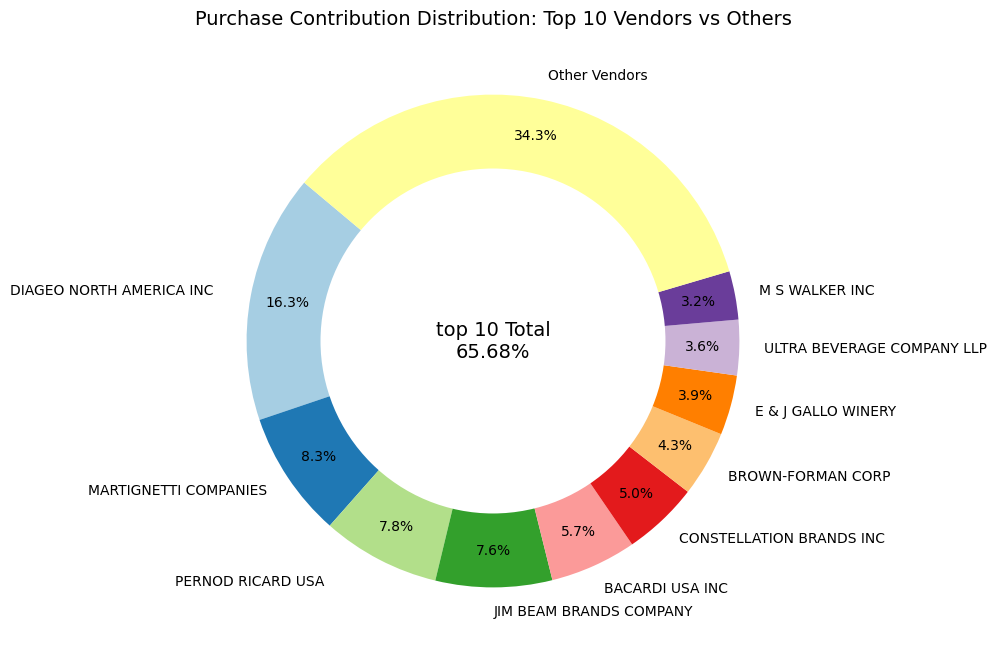

In [91]:
vendors = list(top_vendor['VendorName'].values)
purchase_contributions = list(top_vendor['purchase_contributiion%'].values)
total_contribution = top_vendor['purchase_contributiion%'].sum()
remaining_contribution = 100 - total_contribution

#append"other vendors"category 
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

#donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                   startangle=140, pctdistance=0.85,colors= plt.cm.Paired.colors)

#draw a white circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# add total contribution text in the center
plt.text(0, 0, f'top 10 Total\n{round(total_contribution,2)}%', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Purchase Contribution Distribution: Top 10 Vendors vs Others', fontsize=14)

In [92]:
# does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost saving ?

In [93]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


In [94]:
df["OrderSize"] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [95]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,39.068186
1,Medium,15.486414
2,Large,10.777625


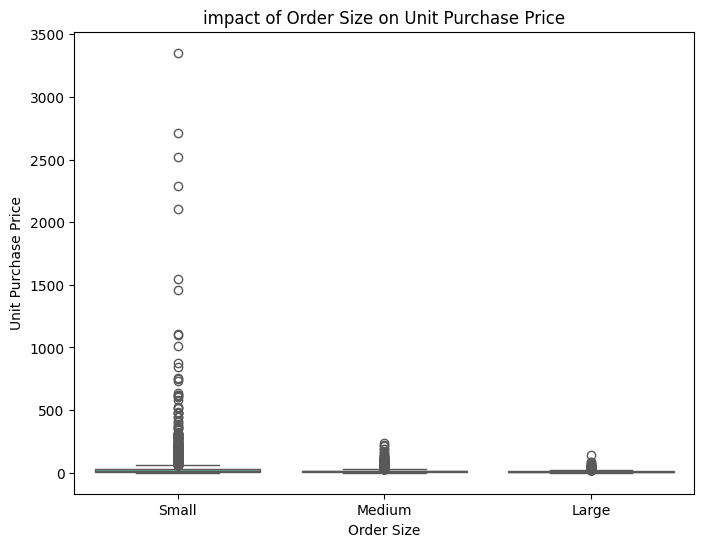

In [96]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, palette='Set2')
plt.title('impact of Order Size on Unit Purchase Price')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price')
plt.show()

In [97]:
#which vendor haslow inventry turnover , indicating excess stock or slow moving products

In [98]:
df[df['StockTurnover']<1].groupby('VendorName')['StockTurnover'].mean().reset_index().sort_values('StockTurnover').head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
61,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
79,SMOKY QUARTZ DISTILLERY LLC,0.783835
91,TAMWORTH DISTILLING,0.797078
92,THE IMPORTED GRAPE LLC,0.807569
102,WALPOLE MTN VIEW WINERY,0.820548


In [99]:
#how much capital is locked in unsold inventry per vendor ,and which vendors contribute the most to it 

In [100]:
df["UnsoldInventoryValue"]= (df["TotalSalesQuantity"]-df["TotalPurchaseQuantity"])* df["AvgPurchasePrice"]
print('Total Unsold Capital :'), format_dollars(df["UnsoldInventoryValue"].sum())

Total Unsold Capital :


(None, '-2708177.2199999997')

In [101]:
#aggregate capital locked per vendor
inventry_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index().sort_values('UnsoldInventoryValue', ascending=False)
inventry_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
6,BACARDI USA INC,297727.67
107,ULTRA BEVERAGE COMPANY LLP,188477.66
57,MARTIGNETTI COMPANIES,113172.56
53,M S WALKER INC,102891.05
89,SOUTHERN WINE & SPIRITS NE,71058.27
91,STATE WINE & SPIRITS,60411.69
60,MHW LTD,52999.36
37,FREDERICK WILDMAN & SONS,46011.80
52,LUXCO INC,45223.00
1,ALISA CARR BEVERAGES,43151.48


In [102]:
#what is the 95% confidence interval for profit margins of top-performing and low performing vendors.

In [103]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)




In [104]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [105]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [106]:
low_vendors


5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [107]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/np.sqrt(n)
    t_critical = stats.t.ppf((1 + confidence) / 2, n - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error
    

Top Vendors 95% CI for Profit Margin: Mean=31.18, CI=(30.74, 31.61)
Low Vendors 95% CI for Profit Margin: Mean=41.57, CI=(40.50, 42.64)


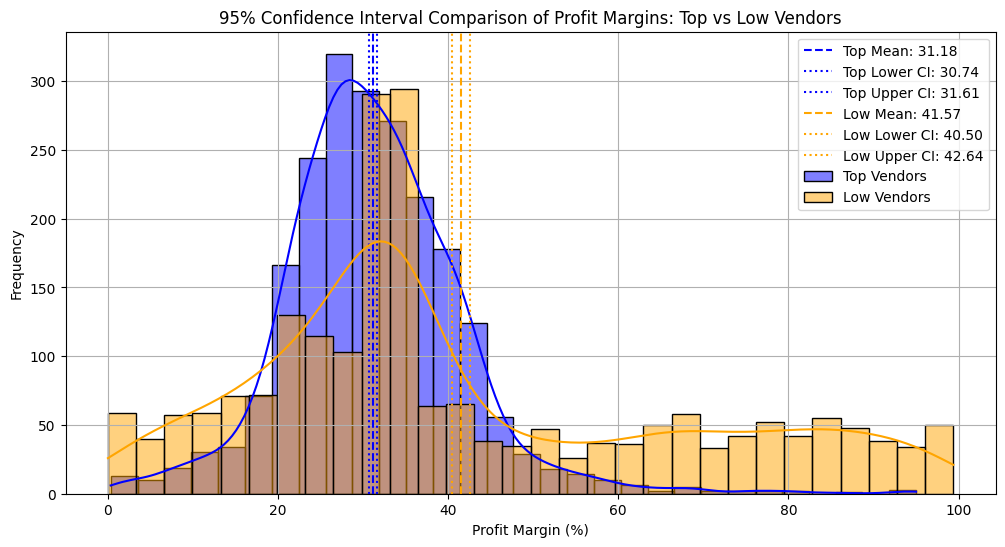

In [108]:
# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI for Profit Margin: Mean={top_mean:.2f}, CI=({top_lower:.2f}, {top_upper:.2f})")
print(f"Low Vendors 95% CI for Profit Margin: Mean={low_mean:.2f}, CI=({low_lower:.2f}, {low_upper:.2f})")

plt.figure(figsize=(12,6))

# -------------------------------
# TOP VENDORS DISTRIBUTION
# -------------------------------
sns.histplot(top_vendors, color='blue', kde=True, alpha=0.5, bins=30, label='Top Vendors')
plt.axvline(top_mean, color='blue', linestyle='--', label=f'Top Mean: {top_mean:.2f}')
plt.axvline(top_lower, color='blue', linestyle=':', label=f'Top Lower CI: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle=':', label=f'Top Upper CI: {top_upper:.2f}')

# -------------------------------
# LOW VENDORS DISTRIBUTION
# -------------------------------
sns.histplot(low_vendors, color='orange', kde=True, alpha=0.5, bins=30, label='Low Vendors')
plt.axvline(low_mean, color='orange', linestyle='--', label=f'Low Mean: {low_mean:.2f}')
plt.axvline(low_lower, color='orange', linestyle=':', label=f'Low Lower CI: {low_lower:.2f}')
plt.axvline(low_upper, color='orange', linestyle=':', label=f'Low Upper CI: {low_upper:.2f}')

# Final Plot Setup
plt.title('95% Confidence Interval Comparison of Profit Margins: Top vs Low Vendors')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [109]:
#is there a significant difference in mean profit margins between top-performing and low-performing vendors?
#via hypothesis testing (t-test)

#ho - null hypothesis: there is no significant difference in mean profit margins between top-performing and low-performing vendors
#ha - alternative hypothesis: there is a significant difference in mean profit margins between top-performing and low-performing vendors

In [110]:
top_threshold= df['TotalSalesDollars'].quantile(0.75)
low_threshold= df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

#perform two sample t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#print results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in mean profit margins between top-performing and low-performing vendors.")       
else:
    print("Fail to reject the null hypothesis: No significant difference in mean profit margins between top-performing and low-performing vendors.")



T-statistic: -17.6695, P-value: 0.0000
Reject the null hypothesis: Significant difference in mean profit margins between top-performing and low-performing vendors.
